# 모델의 예측값과 라벨을 파일로 저장

In [9]:
import os
import ember
import numpy as np
import pandas as pd
import altair as alt
import lightgbm as lgb
import matplotlib.pylab as plt
from sklearn.metrics import roc_auc_score, roc_curve
import subprocess
import tqdm

#feautres.json, 학습한 모델이 있는 경로
data_dir = ''
data = pd.read_csv('')

#추출된 특징의 갯수 구하기
parameter_popen = ['wc', '-l', os.path.join(data_dir, 'features.jsonl')]
resut = subprocess.Popen(parameter_popen, stdout=subprocess.PIPE, universal_newlines=True).communicate()[0]
rows = int(resut.split(' ')[0])

#features.jsonl특징을 학습하기 위해 차원변환 -> X.dat, y.dat 생성
#ember.create_vectorized_features(data_dir, rows)

#X.dat, y.dat 파일 읽기
X, y = ember.read_vectorized_features(data_dir,rows)
#학습된 모델 로드
lgbm_model = lgb.Booster(model_file=os.path.join(data_dir, "model.txt"))


err = []
y = []
y_pred = []
_name = []

testdir = "/media/root/ABC/dataset/TestSet_final1/"
y_pred = []
for filename in tqdm.tqdm(os.listdir(testdir)):
    _file = os.path.join(testdir, filename)

    if os.path.isfile(_file):
        binary = open(_file, "rb").read()

        try:
            
            y_pred.append(ember.predict_sample(lgbm_model, binary))
            y.append(data[data.hash == filename].values[0][1])
            _name.append(filename)
        except KeyboardInterrupt:
            sys.exit()
        except:
            err.append(filename)
            

import pandas as pd

r = pd.DataFrame({'hash': _name, 'label': y, 'y_pred': y_pred})
r.to_csv('')
for name in err:
    print("Error %s" %(name))
print("Done")

100%|██████████| 10001/10001 [20:27<00:00,  8.15it/s]

Error 045b736281fa4aeb9d98575c5b3f9105.vir
Error c8dac3de308745427b8be452b13015fd.vir
Done


# 예측값을 시각화

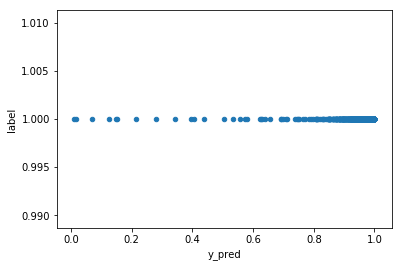

In [19]:
predict_malicious = tdf[tdf.label == 1]
predict_malicious.plot.scatter(x='y_pred', y='label')

In [24]:
print("악성코드 갯수 : %d" % predict_malicious.label.sum())
print("악성코드로 예측한 값 중에 0.65미만 개수 : %d" % predict_malicious[predict_malicious.y_pred <= 0.65].label.sum())

악성코드 갯수 : 6999
악성코드로 예측한 값 중에 0.65미만 개수 : 21


# 예측 출력 샘플

In [8]:
import ember
import lightgbm as lgb
import os

data_dir = '/' #학습한 모델이 있는 경로
lgbm_model = lgb.Booster(model_file=os.path.join(data_dir, "model.txt")로 #모델 로드

samplepath = '' #분석할 파일
_sample = open(samplepath, 'rb').read(일 #바이너리 읽기
y_pred = ember.predict_sample(lgbm_model, _sample기 #예측

print(y_pred) #예측 출력

0.9692753949509041
